# DATA CLEANING

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [185]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [187]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

### More than half of dataset is null within the User_Count column... plotting to better emphasize those with extreme values

In [188]:
missing = df.isna().sum()

Text(0.5, 1.0, 'Sum of Missing Values by Feature')

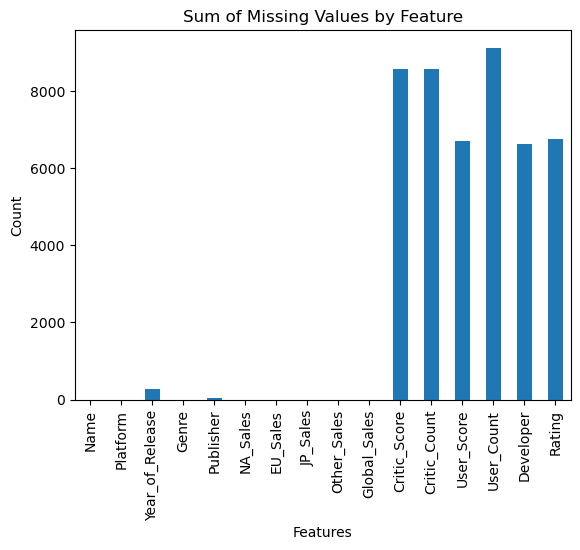

In [189]:
missing.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Sum of Missing Values by Feature')

### Ideally would like to keep all values but for the sake of simplicity will drop all nulls despite quick and dirty work

In [190]:
df.dropna(inplace=True)

In [191]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [192]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

### Appropriate datatypes

#### Column Transformer Function

In [193]:
def column_transformer(column_to_transform, type):
    df[column_to_transform] = df[column_to_transform].astype(type)
    return df.dtypes

In [194]:
column_transformer(['Year_of_Release'], int)

Name                object
Platform            object
Year_of_Release      int32
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

#### OneHotEncoder Function

In [195]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [196]:
def Ohe(column):
    ohe = OneHotEncoder(handle_unknown='ignore')
    df[f'{column.name}'] = ohe.fit_transform(df[[f'{column.name}']]).toarray()
    globals()[f'df_{column.name}_categories'] = list(ohe.get_feature_names_out())
    
    print(f'Passing column ["{column.name}"]) through OneHotEncoder(): \n')
    
    for i in range(0, len(list(ohe.get_feature_names_out()))):
        print(f'Categorical Value {ohe.inverse_transform([i])} is replaced with value {[i]}')
    print(f'\n[df_{column.name}_categories] = ', globals() [f'df_{column.name}_categories'])

In [197]:
def dummyEncode_column(column):
    le = LabelEncoder()
    df[f'{column.name}'] = le.fit_transform(df[f'{column.name}'])
    globals() [f'df_{column.name}_categories'] = list(le.classes_)
    
    print(f'After passing column ["{column.name}"] through LabelEncoder(): \n')
    
    for i in range(0,len(list(le.classes_))):
        print(f'Categorical value {le.inverse_transform([i])} is replaced with numerical value {[i]}')   
    
    print(f'\n[df_{column.name}_categories] = ', globals() [f'df_{column.name}_categories'])
    
    display(df)

In [198]:
test = df.copy()

In [176]:
ohe = OneHotEncoder()
ohe_test = ohe.fit_transform(test[['Genre','Platform']]).toarray()
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names_out())

In [177]:
ohe_test

,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,...,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6821,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
dummyEncode_column(test.Genre)

After passing column ["Genre"] through LabelEncoder(): 

Categorical value ['Action'] is replaced with numerical value [0]
Categorical value ['Adventure'] is replaced with numerical value [1]
Categorical value ['Fighting'] is replaced with numerical value [2]
Categorical value ['Misc'] is replaced with numerical value [3]
Categorical value ['Platform'] is replaced with numerical value [4]
Categorical value ['Puzzle'] is replaced with numerical value [5]
Categorical value ['Racing'] is replaced with numerical value [6]
Categorical value ['Role-Playing'] is replaced with numerical value [7]
Categorical value ['Shooter'] is replaced with numerical value [8]
Categorical value ['Simulation'] is replaced with numerical value [9]
Categorical value ['Sports'] is replaced with numerical value [10]
Categorical value ['Strategy'] is replaced with numerical value [11]

[df_Genre_categories] =  ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'S

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,10,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,6,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,10,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,4,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,3,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001,0,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002,2,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,0,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011,8,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [179]:
# Ohe(test.Platform)

#### Continuing w. LabelEncoder() until I get OHE Fixed

In [199]:
df.Platform.value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

In [181]:
dummyEncode_column(df['Platform'])

After passing column ["Platform"] through LabelEncoder(): 

Categorical value ['3DS'] is replaced with numerical value [0]
Categorical value ['DC'] is replaced with numerical value [1]
Categorical value ['DS'] is replaced with numerical value [2]
Categorical value ['GBA'] is replaced with numerical value [3]
Categorical value ['GC'] is replaced with numerical value [4]
Categorical value ['PC'] is replaced with numerical value [5]
Categorical value ['PS'] is replaced with numerical value [6]
Categorical value ['PS2'] is replaced with numerical value [7]
Categorical value ['PS3'] is replaced with numerical value [8]
Categorical value ['PS4'] is replaced with numerical value [9]
Categorical value ['PSP'] is replaced with numerical value [10]
Categorical value ['PSV'] is replaced with numerical value [11]
Categorical value ['Wii'] is replaced with numerical value [12]
Categorical value ['WiiU'] is replaced with numerical value [13]
Categorical value ['X360'] is replaced with numerical valu

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,12,2006,10,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,12,2008,6,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,12,2009,10,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,2,2006,4,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,12,2006,3,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,3,2001,0,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,3,2002,2,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,5,2014,0,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,5,2011,8,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [201]:
df['Genre'].value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

In [202]:
dummyEncode_column(df['Genre'])

After passing column ["Genre"] through LabelEncoder(): 

Categorical value ['Action'] is replaced with numerical value [0]
Categorical value ['Adventure'] is replaced with numerical value [1]
Categorical value ['Fighting'] is replaced with numerical value [2]
Categorical value ['Misc'] is replaced with numerical value [3]
Categorical value ['Platform'] is replaced with numerical value [4]
Categorical value ['Puzzle'] is replaced with numerical value [5]
Categorical value ['Racing'] is replaced with numerical value [6]
Categorical value ['Role-Playing'] is replaced with numerical value [7]
Categorical value ['Shooter'] is replaced with numerical value [8]
Categorical value ['Simulation'] is replaced with numerical value [9]
Categorical value ['Sports'] is replaced with numerical value [10]
Categorical value ['Strategy'] is replaced with numerical value [11]

[df_Genre_categories] =  ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'S

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,10,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,6,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,10,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,4,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,3,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001,0,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002,2,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,0,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011,8,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [204]:
df['Platform'].value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

In [205]:
dummyEncode_column(df['Platform'])

After passing column ["Platform"] through LabelEncoder(): 

Categorical value ['3DS'] is replaced with numerical value [0]
Categorical value ['DC'] is replaced with numerical value [1]
Categorical value ['DS'] is replaced with numerical value [2]
Categorical value ['GBA'] is replaced with numerical value [3]
Categorical value ['GC'] is replaced with numerical value [4]
Categorical value ['PC'] is replaced with numerical value [5]
Categorical value ['PS'] is replaced with numerical value [6]
Categorical value ['PS2'] is replaced with numerical value [7]
Categorical value ['PS3'] is replaced with numerical value [8]
Categorical value ['PS4'] is replaced with numerical value [9]
Categorical value ['PSP'] is replaced with numerical value [10]
Categorical value ['PSV'] is replaced with numerical value [11]
Categorical value ['Wii'] is replaced with numerical value [12]
Categorical value ['WiiU'] is replaced with numerical value [13]
Categorical value ['X360'] is replaced with numerical valu

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,12,2006,10,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,12,2008,6,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,12,2009,10,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,2,2006,4,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,12,2006,3,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,3,2001,0,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,3,2002,2,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,5,2014,0,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,5,2011,8,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [206]:
df['Rating'].value_counts()

T       2377
E       2082
M       1433
E10+     930
AO         1
K-A        1
RP         1
Name: Rating, dtype: int64

In [207]:
dummyEncode_column(df['Rating'])

After passing column ["Rating"] through LabelEncoder(): 

Categorical value ['AO'] is replaced with numerical value [0]
Categorical value ['E'] is replaced with numerical value [1]
Categorical value ['E10+'] is replaced with numerical value [2]
Categorical value ['K-A'] is replaced with numerical value [3]
Categorical value ['M'] is replaced with numerical value [4]
Categorical value ['RP'] is replaced with numerical value [5]
Categorical value ['T'] is replaced with numerical value [6]

[df_Rating_categories] =  ['AO', 'E', 'E10+', 'K-A', 'M', 'RP', 'T']


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,12,2006,10,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,1
2,Mario Kart Wii,12,2008,6,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,1
3,Wii Sports Resort,12,2009,10,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,1
6,New Super Mario Bros.,2,2006,4,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,1
7,Wii Play,12,2006,3,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,3,2001,0,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,1
16677,Mortal Kombat: Deadly Alliance,3,2002,2,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,4
16696,Metal Gear Solid V: Ground Zeroes,5,2014,0,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,4
16700,Breach,5,2011,8,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,6


In [208]:
df['Developer'].value_counts()

EA Canada                             149
EA Sports                             142
Capcom                                126
Ubisoft                               103
Konami                                 95
                                     ... 
Sanzaru Games, Sanzaru Games, Inc.      1
SCEA, Think and Feel                    1
Ubisoft Annecy                          1
Omega Force, Koei Canada                1
Atomic Games                            1
Name: Developer, Length: 1289, dtype: int64

In [209]:
df.to_csv('cleaned_data')